In [32]:
import numpy as np
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
register_matplotlib_converters()
from statsmodels.tsa.stattools import acf
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [8]:
#Read Data
ice_cream= pd.read_csv('https://raw.githubusercontent.com/ritvikmath/Time-Series-Analysis/master/ice_cream.csv', parse_dates= ['DATE'], index_col= 'DATE')
ice_cream.head()

,IPN31152N
DATE,
1972-01-01,59.9622
1972-02-01,67.0605
1972-03-01,74.2350
1972-04-01,78.1120
1972-05-01,84.7636


In [9]:
# Rename columns to something more understandable
ice_cream.rename(columns= {'IPN31152N': 'production'}, inplace= True)

In [10]:
ice_cream.head()

,production
DATE,
1972-01-01,59.9622
1972-02-01,67.0605
1972-03-01,74.2350
1972-04-01,78.1120
1972-05-01,84.7636


In [11]:
len(ice_cream)

577

In [12]:
ice_cream.tail()

,production
DATE,
2019-09-01,100.1741
2019-10-01,90.1684
2019-11-01,79.7223
2019-12-01,75.7094
2020-01-01,83.6290


In [13]:
#We donot need so large data set. Considering data from last 2010
start_date= pd.to_datetime('2010-01-01') # Ten year data
ice_cream= ice_cream[start_date:] 

In [14]:
ice_cream.head()

,production
DATE,
2010-01-01,91.2895
2010-02-01,110.4994
2010-03-01,127.0971
2010-04-01,132.6468
2010-05-01,134.5576


In [21]:
from datetime import datetime, timedelta

In [24]:
# Train test split
start_date= datetime(2010,1,1)
end_date= datetime(2018, 1, 1)
train= ice_cream[start_date: end_date]
test= ice_cream[end_date:]

In [25]:
print('train data length', len(train))
print('Test data length', len(test))

train data length 97
Test data length 25


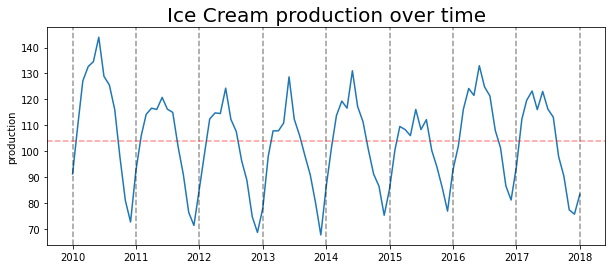

In [37]:
plt.figure(figsize= (10, 4))
plt.plot(train['production'])
plt.title('Ice Cream production over time', fontsize= 20)
plt.ylabel('production')
for year in range(2010, 2019):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color= 'k', linestyle= '--', alpha= 0.4) #Seasonaity is evident
plt.axhline(train.production.mean(), linestyle= '--', color= 'r', alpha= 0.4)

In [28]:
train.isna().sum() # No null value

production    0
dtype: int64

In [29]:
# Check if the series is stationarity
from statsmodels.tsa.stattools import adfuller

print('P value of ADF Test:',adfuller(train.production)[1]) # No differencing required d= 0

P value of ADF Test: 0.03976439600580457


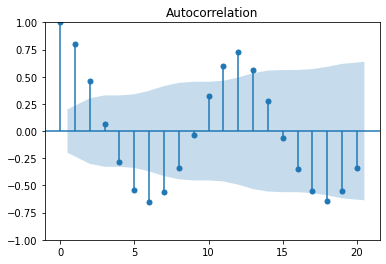

In [30]:
acf_plot= plot_acf(train.production) # Seasonalty is evident from the acf plot, q= 2

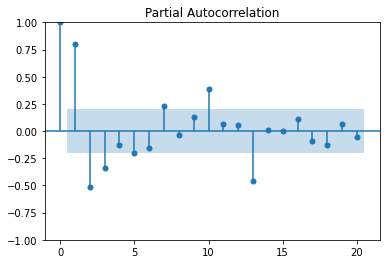

In [38]:
pacf_plot= plot_pacf(train.production, method= 'ywm') #p=1

Based on PACF we should start with an Auto Rgeressive model with lags 1, 2, 3, 10, 13

In [40]:
from statsmodels.tsa.arima.model import ARIMA

In [42]:
# ARIMA(1,0,2)
model1= ARIMA(train.production, order= (1,0,2)).fit()
print(model1.summary())

C:\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                               SARIMAX Results                                
Dep. Variable:             production   No. Observations:                   97
Model:                 ARIMA(1, 0, 2)   Log Likelihood                -343.258
Date:                Sat, 12 Feb 2022   AIC                            696.517
Time:                        10:40:50   BIC                            709.391
Sample:                    01-01-2010   HQIC                           701.722
                         - 01-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        103.4012      4.106     25.181      0.000      95.353     111.449
ar.L1          0.4674      0.098      4.747      0.000       0.274       0.660
ma.L1          0.7454      0.084      8.838      0.0

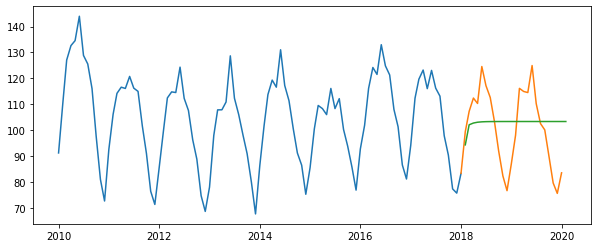

In [44]:
plt.figure(figsize= (10, 4))
plt.plot(train.production)
plt.plot(test.production)
plt.plot(model1.forecast(25)) 

Not a good result because of overlooking seasonality

In [45]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [47]:
# SARIMA(1,0,2)(1,0,2,12)
model2= SARIMAX(train.production, order= (1,0,2), seasonal_order= (1,0,2,12)).fit()
print(model2.summary())

C:\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
C:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


                                     SARIMAX Results                                      
Dep. Variable:                         production   No. Observations:                   97
Model:             SARIMAX(1, 0, 2)x(1, 0, 2, 12)   Log Likelihood                -286.309
Date:                            Sat, 12 Feb 2022   AIC                            586.617
Time:                                    10:45:13   BIC                            604.640
Sample:                                01-01-2010   HQIC                           593.905
                                     - 01-01-2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9611      0.047     20.368      0.000       0.869       1.054
ma.L1         -0.0498      0.112   

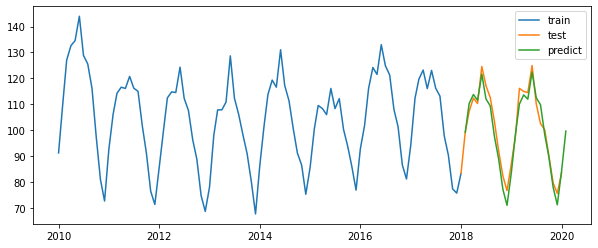

In [49]:
plt.figure(figsize= (10, 4))
plt.plot(train.production)
plt.plot(test.production)
plt.plot(model2.forecast(25))
plt.legend(['train', 'test', 'predict'])

Better model